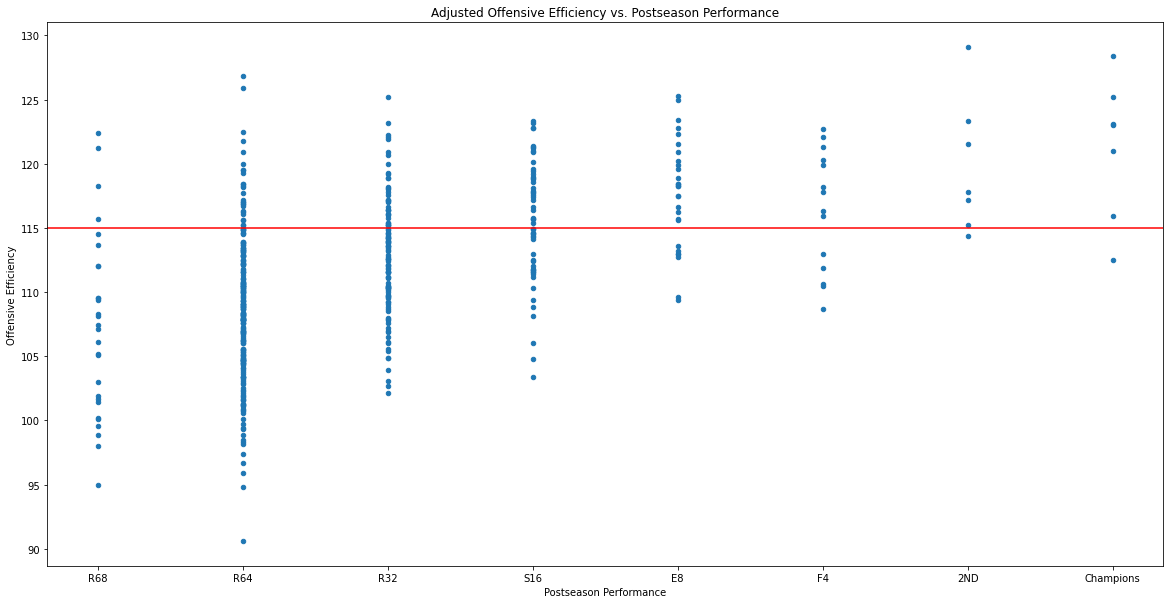

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype

filepath = 'C:/Users/herui/Downloads/cbb.csv'
cbb = pd.read_csv(filepath)

cbb_teams=cbb[(cbb['SEED']>0)]
results = ['R68','R64','R32','S16','E8','F4','2ND','Champions']

#adjusted offensive efficiency sorted by postseason performance
oe = cbb_teams[(cbb_teams['ADJOE'] >= 0) ].copy()
oe['POSTSEASON']= pd.Categorical(oe['POSTSEASON'], results)
oe=oe.sort_values('POSTSEASON')

oe.plot(kind='scatter', x='POSTSEASON', y='ADJOE', figsize=(20,10))
plt.title("Adjusted Offensive Efficiency vs. Postseason Performance")
plt.xlabel('Postseason Performance')
plt.ylabel('Offensive Efficiency')
plt.axhline(y=115.0,color='r',linestyle='-')

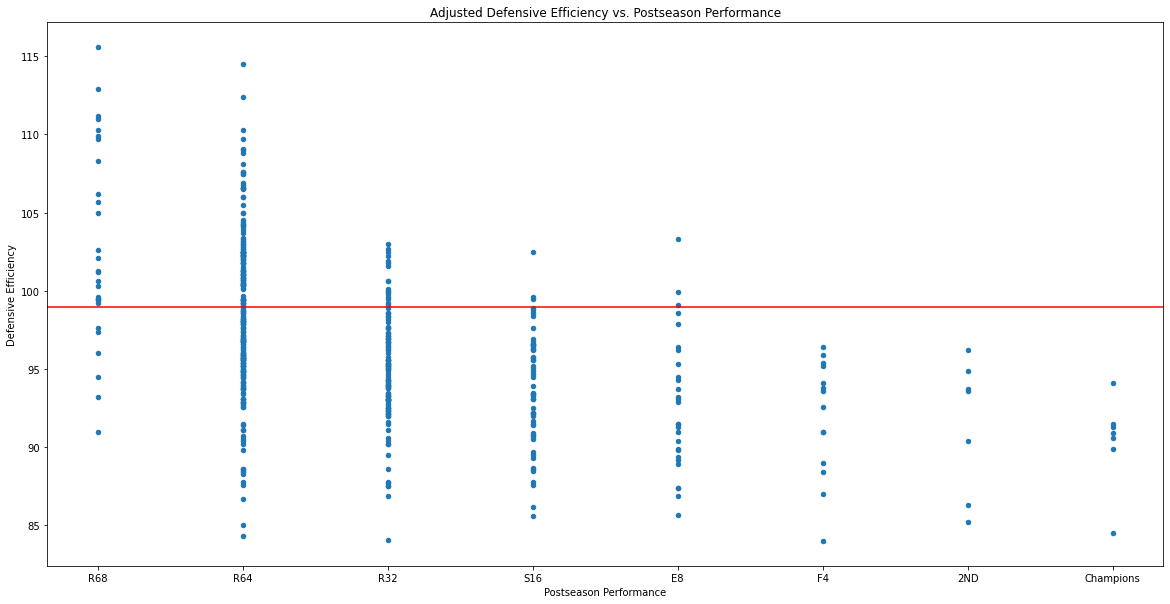

In [2]:
#adjusted defensive efficiency sorted by postseason performance
de = cbb_teams[(cbb_teams['ADJDE']>=0 )].copy()
de['POSTSEASON']= pd.Categorical(de['POSTSEASON'], results)
de=de.sort_values('POSTSEASON')

de.plot(kind='scatter', x='POSTSEASON', y='ADJDE', figsize=(20,10))
plt.title("Adjusted Defensive Efficiency vs. Postseason Performance")
plt.xlabel('Postseason Performance')
plt.ylabel('Defensive Efficiency')
plt.axhline(y=99.0,color='r',linestyle='-')

In [3]:
#table of average and standard devication of ADJOE and ADJDE by performance
avr_oe=[]
std_oe=[]
avr_de=[]
std_de=[]

for i in results:
    avr_oe.append(cbb_teams[cbb_teams['POSTSEASON']==i]['ADJOE'].mean())
    std_oe.append(cbb_teams[cbb_teams['POSTSEASON']==i]['ADJOE'].std())
    avr_de.append(cbb_teams[cbb_teams['POSTSEASON']==i]['ADJDE'].mean())
    std_de.append(cbb_teams[cbb_teams['POSTSEASON']==i]['ADJDE'].std())

eff=pd.DataFrame(np.column_stack([avr_oe, std_oe,avr_de,std_de]), 
                               columns=['ADJOE','STDEV','ADJDE','STDEV'])
eff.index=results
eff


,ADJOE,STDEV,ADJDE,STDEV
R68,107.332143,7.096950,102.885714,6.349320
R64,108.716964,5.693918,98.535714,5.124676
R32,112.825893,4.645384,95.056250,3.681186
S16,115.514286,4.675640,93.750000,3.694320
E8,117.742857,4.242067,92.810714,4.355868
F4,116.371429,4.712084,91.957143,3.719742
2ND,119.785714,5.207504,91.471429,4.297951
Champions,121.300000,5.453439,90.400000,2.917190


Text(0.5, 1.0, 'Average Offensive Efficiency vs. Performance in March Madness from 2013-2019 ')

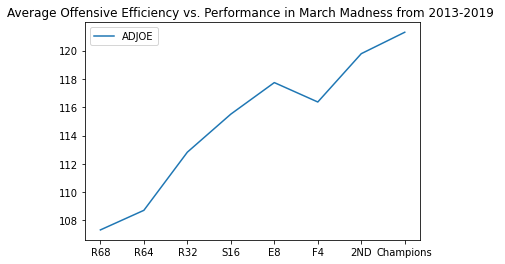

In [4]:
eff.plot(y='ADJOE')
plt.title('Average Offensive Efficiency vs. Performance in March Madness from 2013-2019 ')

Text(0.5, 1.0, 'Average Defensive Efficiency vs. Performance in March Madness from 2013-2019 ')

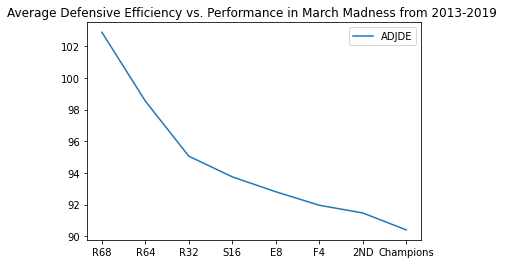

In [5]:
eff.plot(y='ADJDE')
plt.title('Average Defensive Efficiency vs. Performance in March Madness from 2013-2019 ')

In [6]:
ge115=[]
le115=[]
ge99=[]
le99=[]
for i in results:
    ge115.append(len(cbb_teams[(cbb_teams['POSTSEASON']==i) & (cbb_teams['ADJOE'] >= 115)]))
    le115.append(len(cbb_teams[(cbb_teams['POSTSEASON']==i) & (cbb_teams['ADJOE'] <115)]))
    ge99.append(len(cbb_teams[(cbb_teams['POSTSEASON']==i) & (cbb_teams['ADJDE'] >99)]))
    le99.append(len(cbb_teams[(cbb_teams['POSTSEASON']==i) & (cbb_teams['ADJDE'] <= 99)]))
    
comparison=pd.DataFrame(np.column_stack([ge115, le115, ge99, le99]), 
                               columns=['ADJOE>=115','ADJOE <115','ADJDE>99','ADJDE<=99'])
comparison.index=results
comparison

,ADJOE>=115,ADJOE <115,ADJDE>99,ADJDE<=99
R68,4,24,22,6
R64,27,197,102,122
R32,34,78,17,95
S16,30,26,3,53
E8,21,7,3,25
F4,9,5,0,14
2ND,6,1,0,7
Champions,6,1,0,7
